# Household Power Consumption dataset 
The goal of the project is to build a model that can predict household power consumption based on historical data. This will allow utilities to better manage the power grid and reduce the need for expensive peak power generation.

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
# Load the data
power = pd.read_csv('/content/Household_power_consumption.csv')
power.head(5)

,datetime,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266670
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333336
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566666
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


In [43]:
# Get a quick overview of the data info()
print(power.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   datetime               object 
 1   Global_active_power    float64
 2   Global_reactive_power  float64
 3   Voltage                float64
 4   Global_intensity       float64
 5   Sub_metering_1         float64
 6   Sub_metering_2         float64
 7   Sub_metering_3         float64
 8   sub_metering_4         float64
dtypes: float64(8), object(1)
memory usage: 142.5+ MB
None


In [67]:
# Get the shape 
power.shape

(2075259, 9)

In [45]:
# Get the summary of the data
power.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,sub_metering_4
count,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06,2.075259e+06
mean,1.089418e+00,1.236871e-01,2.408364e+02,4.618401e+00,1.118474e+00,1.291131e+00,6.448635e+00,9.298722e+00
std,1.054678e+00,1.125933e-01,3.240051e+00,4.433165e+00,6.141460e+00,5.796922e+00,8.433584e+00,9.561278e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-2.400000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.800000e+00
50%,6.020000e-01,1.000000e-01,2.410000e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.500000e+00
75%,1.526000e+00,1.940000e-01,2.428700e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,1.036667e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,1.248333e+02


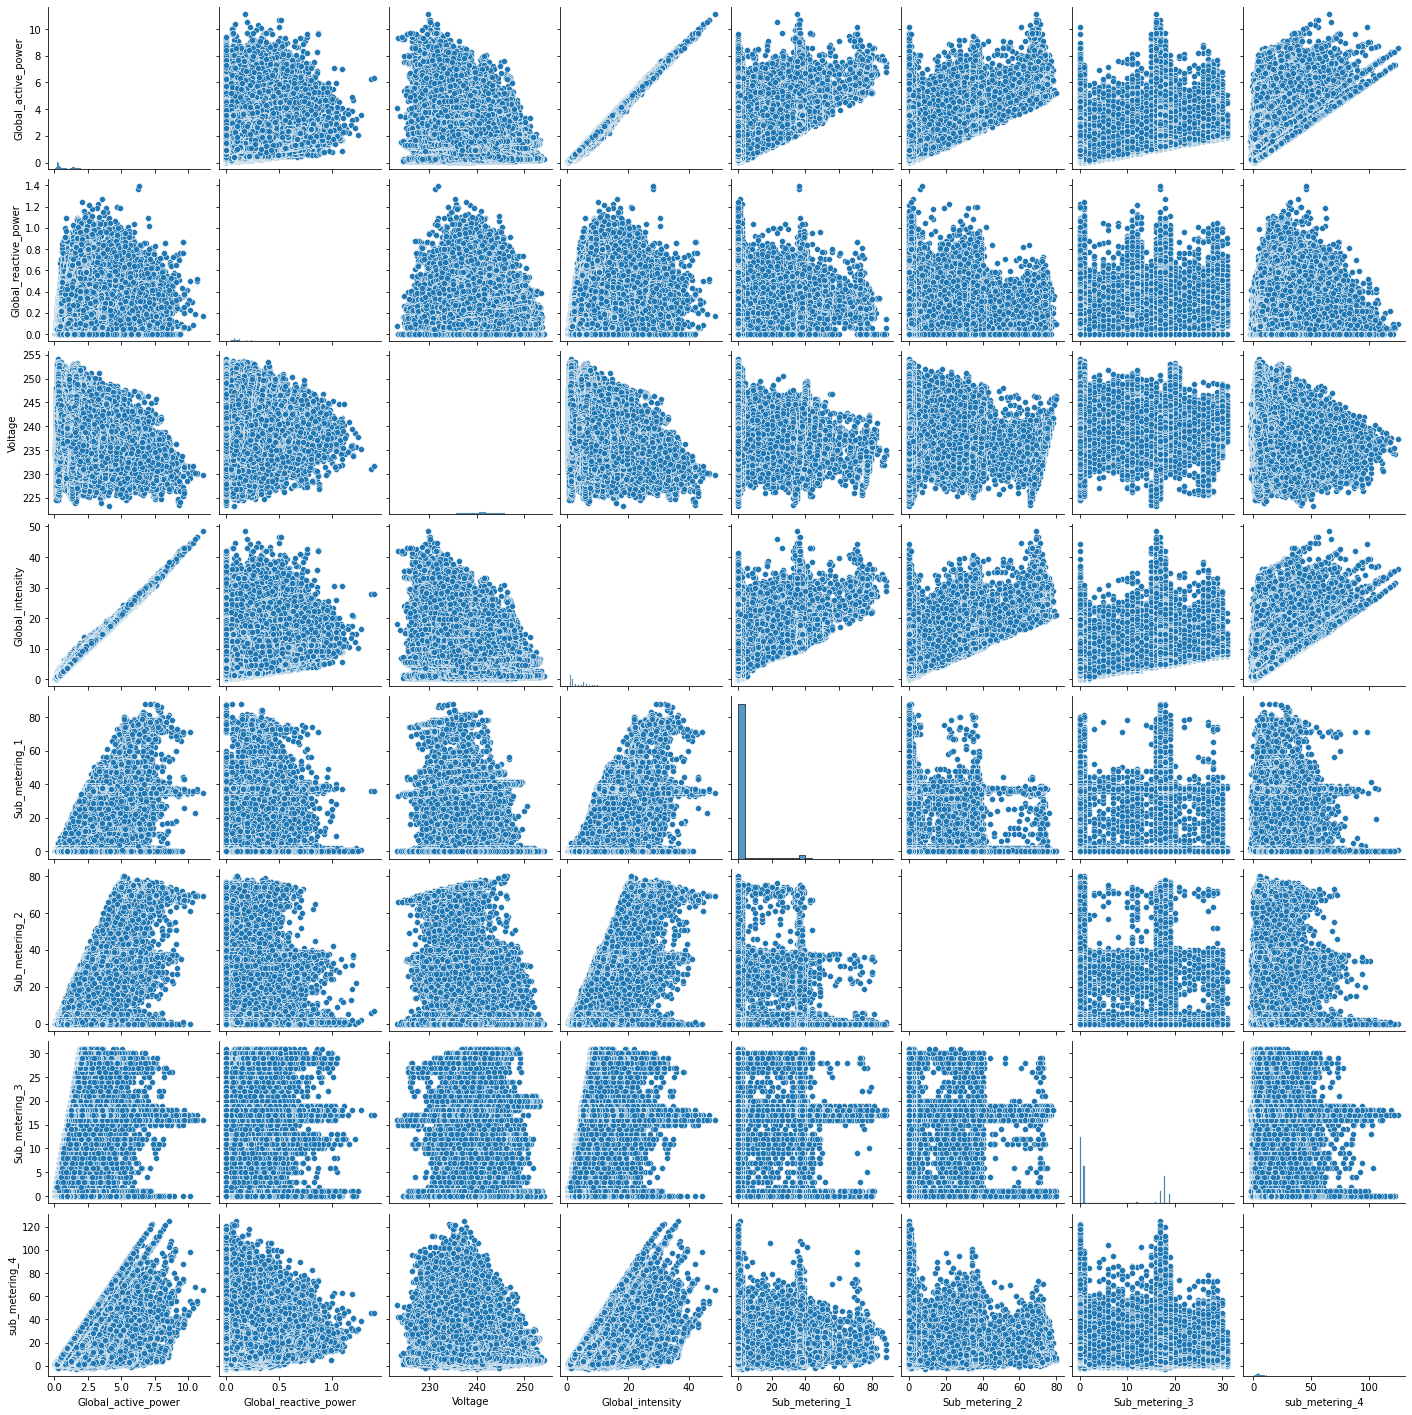

In [46]:
# Use the pairplot() function from seaborn to create scatterplots of all the features
sns.pairplot(power)
plt.show()

In [47]:
# Create a correlation matrix using the corr() function from pandas
corr_matrix = power.corr()

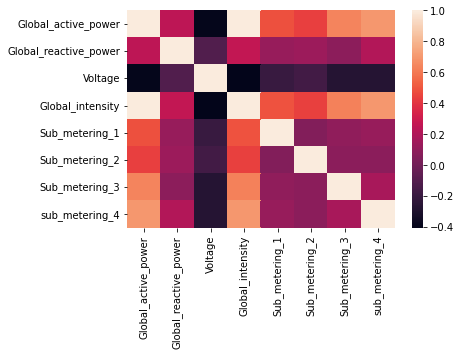

In [48]:
# Create a heatmap using the heatmap() function from seaborn
sns.heatmap(corr_matrix)
plt.show()

In [49]:
power.columns

Index(['datetime', 'Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'sub_metering_4'],
      dtype='object')

## Regression
### Split and Model

In [50]:
# Import the linear_model module from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [51]:
# Create the X and y arrays for the multiple linear regression
X = power[['Global_active_power', 'Global_reactive_power', 
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'sub_metering_4']]
y = power['Voltage']


In [52]:
#Split the data to x and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [53]:
# Create an instance of the LinearRegression class and fit the model to the data
reg = LinearRegression()
reg.fit(X, y)

LinearRegression()

### Evaluation

In [54]:
# print the intercept
print(reg.intercept_)

242.14133708698054


In [55]:
# Print the coefficients of the model
print(reg.coef_)

[-5.91467320e+04  3.65388795e+00 -5.33971542e+00  3.55009125e+03
  3.55009890e+03  3.55003165e+03  3.55008098e+03]


In [56]:
X.columns

Index(['Global_active_power', 'Global_reactive_power', 'Global_intensity',
       'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3', 'sub_metering_4'],
      dtype='object')

In [57]:
coeff_df = pd.DataFrame(reg.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Global_active_power,-59146.731953
Global_reactive_power,3.653888
Global_intensity,-5.339715
Sub_metering_1,3550.091249
Sub_metering_2,3550.098897
Sub_metering_3,3550.031648
sub_metering_4,3550.080981


### Prediction

In [58]:
predictions = reg.predict(X_test)
predictions.shape

(415052,)

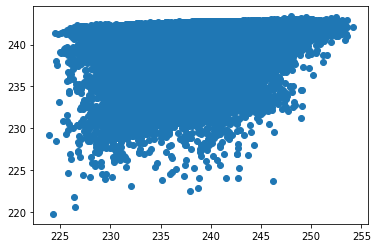

In [59]:
plt.scatter(y_test,predictions)

In [60]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 2.1281620355054054
MSE: 7.922460109236734
RMSE: 2.8146865028341495


## XGBOOST

### Model and Evaluation

In [61]:
import xgboost as xgb
# Create the XGBoost data matrices
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)


In [62]:
# Set the hyperparameters for the XGBoost model
params = {
    'objective': 'reg:squarederror',
    'eval_metric': 'rmse',
    'max_depth': 5,
    'eta': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'silent': 1
}

In [63]:
# Train the model
num_rounds = 200
model = xgb.train(params, dtrain, num_boost_round=num_rounds)

In [64]:
# Make predictions on the test set
predictions = model.predict(dtest)

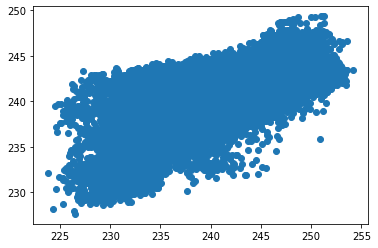

In [65]:
y_test = y_test
plt.scatter(y_test,predictions)

In [66]:
# Calculate the root mean squared error of the predictions
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.799842147116141
MSE: 5.679775966766329
RMSE: 2.3832280559707937
